# Machine Learning for Business & Data Visualisation CA2
    Kate O'Dwyer



https://www.kaggle.com/code/samruddhim/part-2-time-series-analysis

## Import Libraries & Remove Warnings 

In [2]:
#Disable the warnings
import warnings
warnings.filterwarnings('ignore')


#Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import statistics as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

## Reading in Data Set

In [2]:
df = pd.read_csv('train.csv', na_values = 'na')

## Investigating Data Set

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [56]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [57]:
df.info() #information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

- Will need to turn the data into a time series, will also need to remove the NaNs as there seems to be a lot at the the end of the data frame. Will also remove the unnamed column

In [58]:
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


- Will remove all NaNs first before proceeding.

# Data Cleaning

#### Drop 'Row ID'

In [4]:
df.drop(['Row ID'] , axis = 1 , inplace = True)

#### Drop NaNs

In [5]:
df.dropna(axis=0, inplace = True)

In [6]:
df.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [62]:
print(df.isnull().sum())

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


#### Convert Date to datetime series

In [7]:
# Convert date column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'],format="%d/%m/%Y")

In [65]:
# Checking the data type 

df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

#### Check for duplicated values

In [66]:
#Check for duplicate values
print("Number of Duplicated Values: ",df.duplicated().sum())

Number of Duplicated Values:  1


In [8]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

Sort by order date:

In [10]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True) #Sorting data by  ascending order of the coloumn values 'Order Date'
df.set_index("Order Date", inplace = True) #Setting 'Order Date' as index of the dataframe 'df' for ease of Time Series Analysis

Create a new data frame to perform time series on:

In [11]:
df_ts = pd.DataFrame(df['Sales'])
df_ts

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,323.136
2018-12-30,52.776
2018-12-30,90.930


# EDAs

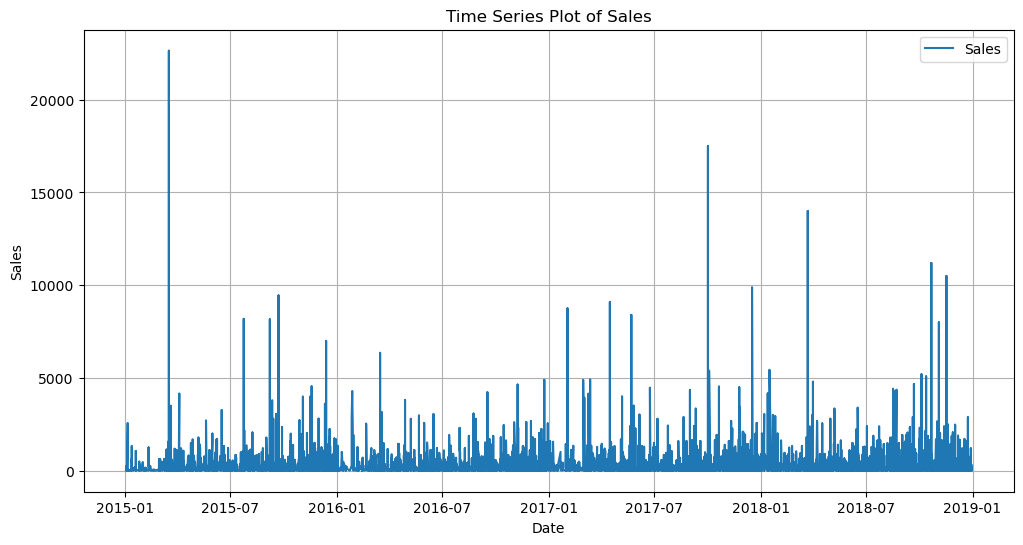

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(df_ts['Sales'], label='Sales')
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

Can we predict the Sales using time series forcasting? 

# Stationary Check - Augmented Dickey-Fuller (ADF) Test:

In [74]:
from statsmodels.tsa.stattools import adfuller

H0 : time series in non stationary 
H1 : time series is stationary

In [75]:
adfuller(df_ts["Sales"])

(-98.40271949957884,
 0.0,
 0,
 9787,
 {'1%': -3.431018337178052,
  '5%': -2.861835364568582,
  '10%': -2.566927217432654},
 153219.6269462235)

As p = 0.0 and is thus below the signifigance level (alpha = 0.05) we can regevt H0 which indicates that the time series is stationary. 

## ACF and PACF Plot:

<Figure size 1200x600 with 0 Axes>

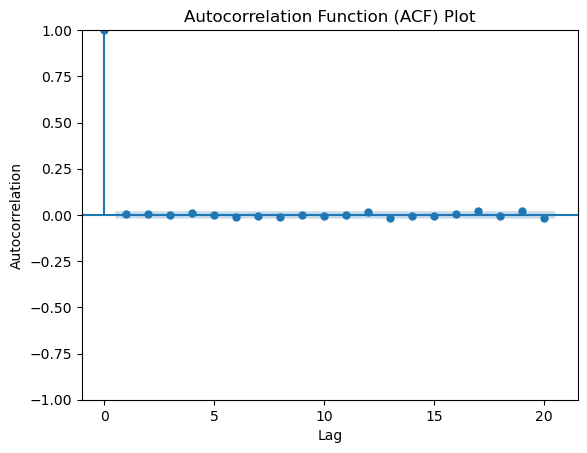

In [83]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df_ts, lags=20)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

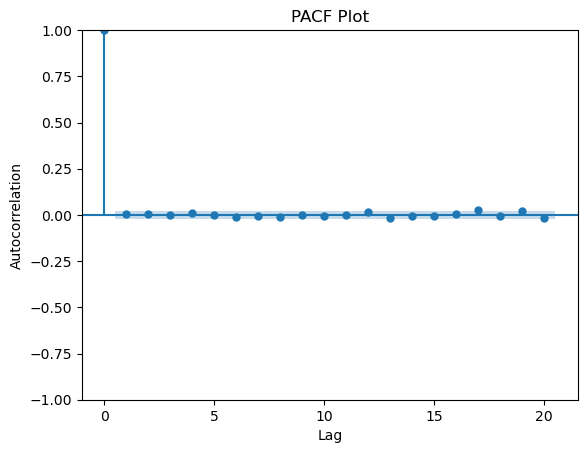

In [84]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 6))
plot_pacf(df_ts, lags=20)
plt.title('PACF Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [88]:
from statsmodels.tsa.arima.model import ARMA

model = ARMA(df_ts, order=(1,1))

results = model.fit()

ImportError: cannot import name 'ARMA' from 'statsmodels.tsa.arima.model' (C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\arima\model.py)

In [89]:
import statsmodels.tsa.api as sm

In [94]:
model = sm.ARIMA(df_ts["Sales"], order=(1, 0, 1)).fit()

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 9788
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -76905.806
Date:                Sun, 19 Nov 2023   AIC                         153819.611
Time:                        22:10:42   BIC                         153848.367
Sample:                             0   HQIC                        153829.355
                               - 9788                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        230.1110      9.548     24.101      0.000     211.397     248.825
ar.L1          0.2463      1.875      0.131      0.895      -3.428       3.921
ma.L1         -0.2401      1.877     -0.128      0.898      -3.919       3.439
sigma2      3.911e+05    699.865    558.872      0.000     3.9e+05    3.93e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          38777679.56
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            13.05
Prob(H) (two-sided):                  0.00   Kurtosis:                       310.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecast Steps

In [98]:
forecast_steps = 10
forecast_results = results.get_forecast(steps=forecast_steps)

NameError: name 'results' is not defined

In [96]:
pred_time = 10
result = model.predict(pred_time)

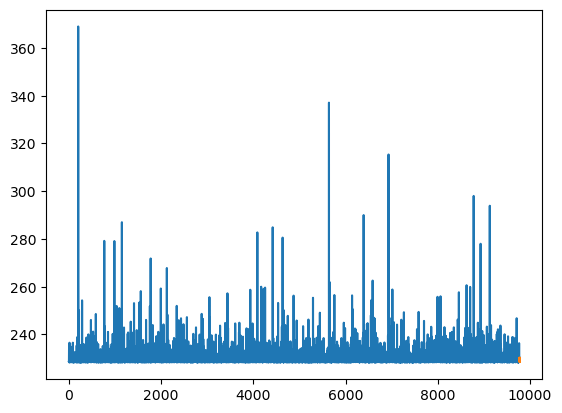

In [97]:
plt.plot(range(len(result)-pred_time), result[:-pred_time])
plt.plot(range(len(result)-pred_time, len(result)), result[-pred_time:])

# Question 2

## Reading in Data Set

In [8]:
df1 = pd.read_csv('covid19_tweets.csv', na_values = 'na')

## Investigating Data Set

In [9]:
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,26/05/2017 05:46,624,950,18775,False,25/07/2020 12:27,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",16/04/2009 20:06,2253,1677,24,True,25/07/2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,28/02/2009 18:57,9275,9525,7254,False,25/07/2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,07/03/2019 01:45,197,987,1488,False,25/07/2020 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,12/02/2017 06:45,101009,168,101,False,25/07/2020 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [10]:
df1.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,30/12/2013 18:59,412,1609,1062,False,29/08/2020 19:44,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,21/12/2011 04:41,150,182,7295,False,29/08/2020 19:44,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,13/07/2016 17:21,1623,2160,98000,False,29/08/2020 19:44,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",27/10/2009 17:43,1338,1111,0,False,29/08/2020 19:44,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False
179107,TUKY II,"Aliwal North, South Africa",TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...,14/04/2018 17:30,97,1697,566,False,29/08/2020 19:44,I stop when I see a Stop\n\n@SABCNews\n@Izinda...,NaN,Twitter for Android,False


In [11]:
df1.info() #information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [12]:
print(df1.isnull().sum())

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64


## Word Cloud

In [14]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/151.4 kB 388.9 kB/s eta 0:00:01
   ---------------------------- --------- 112.6/151.4 kB 819.2 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 899.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
from wordcloud import WordCloud

# Read text from a file
with open('sample_text.txt', 'r') as file:
    text_data = file.read()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object, got 'Series'

# CA2 - Dashboard Creation

In [12]:
df.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2015-01-03,CA-2015-103800,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
2015-01-04,CA-2015-112326,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
2015-01-04,CA-2015-112326,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
2015-01-04,CA-2015-112326,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
2015-01-05,CA-2015-141817,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536


In [13]:
df.tail()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2018-12-30,CA-2018-143259,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
2018-12-30,CA-2018-143259,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776
2018-12-30,CA-2018-143259,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930
2018-12-30,CA-2018-115427,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904
2018-12-30,CA-2018-156720,03/01/2019,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538.0,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024


In [15]:
# Calculate average sales for each state
average_sales = df.groupby('State')['Sales'].mean().reset_index()

# Merge the average sales back into the original DataFrame
df = pd.merge(df, average_sales, on = 'State', how = 'left')

# Rename the new column
df.rename(columns = {'Sales_y': 'Average_Sales'}, inplace = True)
df.rename(columns = {'Sales_x': 'Sales'}, inplace = True)

KeyError: 'Column not found: Sales'

In [19]:
df.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Average_Sales
0,CA-2015-103800,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,173.250290
1,CA-2015-112326,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,164.050760
2,CA-2015-112326,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,164.050760
3,CA-2015-112326,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,164.050760
4,CA-2015-141817,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,199.788058


In [27]:
# Group by the 'Year;
grouped_sales_year = df.groupby('Year').agg({'Sales': 'sum'}).reset_index()

# Display the grouped data
print(grouped_sales_year)

   Year        Sales
0  2015  466760.5011
1  2016  462182.2884
2  2017  599339.2850
3  2018  718884.2694
4  2019    5159.6968


In [26]:
# Convert the 'Shipping_Date' column to datetime objects
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format="%d/%m/%Y")

# Extract the year from the 'Shipping_Date' column
df['Year'] = df['Ship Date'].dt.year

   Year        Sales
0  2015  466760.5011
1  2016  462182.2884
2  2017  599339.2850
3  2018  718884.2694
4  2019    5159.6968


In [34]:
# Mapping dictionary for state abbreviations
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Replace state names with abbreviations
df['State'] = df['State'].map(state_abbr)

In [50]:
# Plot an interactive map with average sales data and a slider
fig = px.choropleth(
    df,
    locations='State',
    locationmode='USA-states',
    color='Average_Sales',
    hover_name='State',
    animation_frame='Year',
    scope='usa',
    color_continuous_scale='Viridis',
    title='Average Sales by State (Yearly)',
    range_color=[0, max(df['Average_Sales'])]
)

In [42]:
# Group by both Item and Sub_Item to get total sales for each sub-item
top_items =df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum'}).reset_index()

# Merge the average sales back into the original DataFramE
df = pd.merge(df, top_items, on = 'Sub-Category', how = 'left')

In [46]:
# Rename the new column
df.rename(columns = {'Category_x': 'Category'}, inplace = True)
df.rename(columns = {'Category_y': 'Category_Sum_Sales'}, inplace = True)
df.rename(columns = {'Sales_y': 'Sales_Sum_Category'}, inplace = True)
df.rename(columns = {'Sales_x': 'Sales'}, inplace = True)

In [51]:
df.tail()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Average_Sales,Year,Category_Sum_Sales,Sales_Sum_Category
9783,CA-2018-143259,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,NY,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,279.271784,2019,Furniture,109408.2987
9784,CA-2018-143259,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,NY,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,279.271784,2019,Office Supplies,200028.7850
9785,CA-2018-143259,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,NY,10009.0,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,279.271784,2019,Technology,326487.6980
9786,CA-2018-115427,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,CA,94533.0,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,229.345562,2019,Office Supplies,200028.7850
9787,CA-2018-156720,2019-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,CO,80538.0,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,177.886022,2019,Office Supplies,3001.9600


In [48]:
# Plot an interactive bar chart
fig = px.bar(
    df,
    x='Category_Sum_Sales',
    y='Sales_Sum_Category',
    hover_data={'Category_Sum_Sales': False, 'Sub-Category': True, 'Sales': ':,.2f'},
    title='Top Selling Items with Sub-Items'
)

# Show the interactive plot
fig.show()